In [1]:


from preprocessors.open_read_check import loader
from prep_tools.cyclic_weekday_encoder import encode_weekday_cyclic
from models.regressor_switch import RegressorSwitch
from visualization.ml_conclusion import ml_conclusion

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

### Loading dataset

In [2]:
df = loader(dir_one="data", dir_two="processed", file_name="AirQualityUCI_capper_scaler.csv")
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Hour
0,2004-03-10,18.00.00,0.384175,1.250363,0.273367,-0.393682,0.919240,0.030313,0.706328,0.642938,-0.541880,-0.020429,-0.672485,2004-03-10 18:00:00,18
1,2004-03-10,19.00.00,-0.081496,0.926020,-0.079162,-0.724869,1.404935,-0.446724,0.308849,-0.123442,-0.576473,-0.091008,-0.753946,2004-03-10 19:00:00,19
2,2004-03-10,20.00.00,0.073727,1.450693,-0.135567,-0.577675,1.264989,0.053029,0.296894,0.140648,-0.737911,0.279532,-0.691653,2004-03-10 20:00:00,20
3,2004-03-10,21.00.00,0.073727,1.326679,-0.107365,-0.362140,1.067418,0.234757,0.383563,0.474645,-0.841692,0.632427,-0.599600,2004-03-10 21:00:00,21
4,2004-03-10,22.00.00,-0.391944,0.830624,-0.488096,-0.577675,1.532533,0.098461,0.102638,0.233857,-0.818630,0.608901,-0.594303,2004-03-10 22:00:00,22


### Create month and weekday from DateTime

In [3]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.weekday  # Monday = 0, Sunday = 6

In [4]:
df.head(50)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Hour,Month,Weekday
0,2004-03-10,18.00.00,0.384175,1.250363,0.273367,-0.393682,0.919240,0.030313,0.706328,0.642938,-0.541880,-0.020429,-0.672485,2004-03-10 18:00:00,18,3,2
1,2004-03-10,19.00.00,-0.081496,0.926020,-0.079162,-0.724869,1.404935,-0.446724,0.308849,-0.123442,-0.576473,-0.091008,-0.753946,2004-03-10 19:00:00,19,3,2
2,2004-03-10,20.00.00,0.073727,1.450693,-0.135567,-0.577675,1.264989,0.053029,0.296894,0.140648,-0.737911,0.279532,-0.691653,2004-03-10 20:00:00,20,3,2
3,2004-03-10,21.00.00,0.073727,1.326679,-0.107365,-0.362140,1.067418,0.234757,0.383563,0.474645,-0.841692,0.632427,-0.599600,2004-03-10 21:00:00,21,3,2
4,2004-03-10,22.00.00,-0.391944,0.830624,-0.488096,-0.577675,1.532533,0.098461,0.102638,0.233857,-0.818630,0.608901,-0.594303,2004-03-10 22:00:00,22,3,2
5,2004-03-10,23.00.00,-0.702391,0.472892,-0.741917,-0.798466,2.075852,-0.355860,-0.187253,-0.182992,-0.818630,0.585374,-0.604391,2004-03-10 23:00:00,23,3,2
6,2004-03-11,00.00.00,-0.702391,0.415655,-0.897030,-0.940404,2.590360,-0.787465,-0.366567,-0.742242,-0.807098,0.444216,-0.666180,2004-03-11 00:00:00,0,3,3
7,2004-03-11,01.00.00,-0.857615,0.181937,-0.939334,-0.940404,2.553315,-0.810181,-0.366567,-0.750010,-0.876286,0.632427,-0.641213,2004-03-11 01:00:00,1,3,3
8,2004-03-11,02.00.00,-0.935227,-0.018393,-1.080345,-1.029772,3.071939,-1.173637,-0.536915,-1.034813,-0.876286,0.614782,-0.654831,2004-03-11 02:00:00,2,3,3
9,2004-03-11,03.00.00,-1.168063,-0.419053,-1.164952,-0.961432,3.374469,-1.228156,-0.659446,-1.342919,-0.922411,0.644190,-0.687870,2004-03-11 03:00:00,3,3,3


### Make cyclic weekday value

In [5]:
df = encode_weekday_cyclic(df, weekday_column="Weekday")
df.head(500)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Hour,Month,Weekday_sin,Weekday_cos
0,2004-03-10,18.00.00,0.384175,1.250363,0.273367,-0.393682,0.919240,0.030313,0.706328,0.642938,-0.541880,-0.020429,-0.672485,2004-03-10 18:00:00,18,3,0.974928,-0.222521
1,2004-03-10,19.00.00,-0.081496,0.926020,-0.079162,-0.724869,1.404935,-0.446724,0.308849,-0.123442,-0.576473,-0.091008,-0.753946,2004-03-10 19:00:00,19,3,0.974928,-0.222521
2,2004-03-10,20.00.00,0.073727,1.450693,-0.135567,-0.577675,1.264989,0.053029,0.296894,0.140648,-0.737911,0.279532,-0.691653,2004-03-10 20:00:00,20,3,0.974928,-0.222521
3,2004-03-10,21.00.00,0.073727,1.326679,-0.107365,-0.362140,1.067418,0.234757,0.383563,0.474645,-0.841692,0.632427,-0.599600,2004-03-10 21:00:00,21,3,0.974928,-0.222521
4,2004-03-10,22.00.00,-0.391944,0.830624,-0.488096,-0.577675,1.532533,0.098461,0.102638,0.233857,-0.818630,0.608901,-0.594303,2004-03-10 22:00:00,22,3,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2004-03-31,09.00.00,0.073727,0.782927,-0.191972,-0.314828,0.161885,0.302905,0.359654,0.189842,-0.910880,1.479375,-0.217013,2004-03-31 09:00:00,9,3,0.974928,-0.222521
496,2004-03-31,10.00.00,-0.314332,0.472892,-0.488096,-0.509335,0.511750,0.143893,0.126546,-0.141566,-0.784036,1.279401,-0.167077,2004-03-31 10:00:00,10,3,0.974928,-0.222521
497,2004-03-31,11.00.00,-0.159108,0.854473,-0.318882,-0.530362,0.285367,-0.060552,0.368620,-0.040590,-0.703317,1.220585,-0.080825,2004-03-31 11:00:00,11,3,0.974928,-0.222521
498,2004-03-31,12.00.00,0.617011,1.584247,0.188760,-0.193918,-0.220909,0.257473,0.945413,0.378848,-0.691786,1.414678,0.049815,2004-03-31 12:00:00,12,3,0.974928,-0.222521


### Split data into X and Y

In [6]:
X = df.drop(columns=['C6H6(GT)', 'Date', 'Time', 'DateTime'])
y = df['C6H6(GT)']

### Train/Test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start Machine Learning

## Linear Regression
---

### Type

In [8]:
model_lin = RegressorSwitch(model_type='linear')

### Train

In [9]:
model_lin.train(X_train, y_train)

### Prediction

In [10]:
y_pred_lin = model_lin.predict(X_test)

### Score

In [11]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
print(f"Model: Linear")
print(f"Mean Squared Error: {mse_lin:.4f}")
print(f"R² Score: {r2_lin:.4f}")
print(f"MAE: {mae_lin:.4f}")

Model: Linear
Mean Squared Error: 0.0598
R² Score: 0.9411
MAE: 0.1843


### Interpretation

- Low MSE indicates that the model's predictions are very close to the actual values — error is minimal.

- High R² score (0.94) means the model explains 94% of the variance in the target variable C6H6(GT) — excellent for a linear model.

- This suggests that features are informative and the preprocessing pipeline is solid.

## Ridge Regression
---

### Type

In [12]:
model_rid = RegressorSwitch(model_type='ridge')

### Train

In [13]:
model_rid.train(X_train, y_train)

### Prediction

In [14]:
y_pred_rid = model_rid.predict(X_test)

### Score

In [15]:
mse_rid = mean_squared_error(y_test, y_pred_rid)
r2_rid = r2_score(y_test, y_pred_rid)
mae_rid = mean_absolute_error(y_test, y_pred_rid)
print(f"Model: Ridge")
print(f"Mean Squared Error: {mse_rid:.4f}")
print(f"R² Score: {r2_rid:.4f}")
print(f"MAE: {mae_rid:.4f}")

Model: Ridge
Mean Squared Error: 0.0598
R² Score: 0.9412
MAE: 0.1842


### Interpretation

- **Mean Squared Error (MSE = 0.0598)**: The low MSE indicates that the model's predictions are very close to the actual values on the test set. This suggests that the model has learned the underlying patterns in the data effectively.

- **R² Score (0.9412)**: The R² score shows that the model explains 94.12% of the variance in the target variable `C6H6(GT)`. This reflects a high level of predictive performance and good generalization ability.



## Lasso Regression
---

### Type

In [16]:
model_las = RegressorSwitch(model_type='lasso')

### Train

In [17]:
model_las.train(X_train, y_train)

### Prediction

In [18]:
y_pred_las = model_las.predict(X_test)
print(model_las.model.model.coef_)


[ 0.17118088  0.18629794  0.         -0.          0.          0.24169002
  0.30848997  0.         -0.00320269 -0.          0.01156455  0.00699521
  0.          0.        ]


### Score

In [19]:
mse_las = mean_squared_error(y_test, y_pred_las)
r2_las = r2_score(y_test, y_pred_las)
mae_las = mean_absolute_error(y_test, y_pred_las)
print(f"Model: Lasso")
print(f"Mean Squared Error: {mse_las:.4f}")
print(f"R² Score: {r2_las:.4f}")
print(f"MAE: {mae_las:.4f}")

Model: Lasso
Mean Squared Error: 0.1083
R² Score: 0.8933
MAE: 0.2491


### Interpretation

- Initially, the model was trained with `alpha=1.0`, which led to an extreme regularization effect — all feature coefficients were shrunk to zero. This completely suppressed the model's ability to learn from the data.

- After reducing the regularization strength to `alpha=0.1`, the model recovered and retained a subset of informative features. Several coefficients became non-zero, indicating active predictors.

- The resulting **MSE of 0.1083** and **R² score of 0.89** show that the model performs reasonably well, though still weaker than Linear or Ridge Regression in this case.

- In summary, the model benefits from reduced regularization. Lasso remains valuable for automatic feature selection, but its sensitivity to `alpha` must be tuned carefully to avoid underfitting.


## Random Forest
---

### Type

In [20]:
model_raf = RegressorSwitch(model_type='rf')

### Train

In [21]:
model_raf.train(X_train, y_train)

### Prediction

In [22]:
y_pred_raf = model_raf.predict(X_test)


### Score

In [23]:
mse_raf = mean_squared_error(y_test, y_pred_las)
r2_raf = r2_score(y_test, y_pred_raf)
mae_raf = mean_absolute_error(y_test, y_pred_raf)
print(f"Model: Random Forest")
print(f"Mean Squared Error: {mse_raf:.4f}")
print(f"R² Score: {r2_raf:.4f}")
print(f"MAE: {mae_raf:.4f}")

Model: Random Forest
Mean Squared Error: 0.1083
R² Score: 0.9796
MAE: 0.0902


### Interpretation

- The **MSE of 0.1083** is low, indicating that the model's predictions are close to the actual values. Although numerically similar to Lasso, Random Forest likely generalizes better due to its ensemble nature.

- The **R² score of 0.9796** suggests that the model explains nearly 98% of the variance in the target variable. This is the highest among all tested models so far, reflecting strong performance.

- Such a high R² confirms that the Random Forest successfully captures complex, possibly non-linear relationships between the features and the target.

- Overall, the model demonstrates excellent predictive power with minimal tuning, making it a robust choice — especially when interpretability is less critical than performance.


## SARIMA
---

### Dataset change

It`s better to use dataset without scaling for SARIMA model. So, we upload previous one

In [24]:
df_sar = loader(dir_one="data", dir_two="processed", file_name="AirQualityUCI_missing_impt.csv")
df_sar.head(5)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Hour
0,2004-03-10,18.00.00,2.6,1360.0,11.9,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,18
1,2004-03-10,19.00.00,2.0,1292.0,9.4,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,19
2,2004-03-10,20.00.00,2.2,1402.0,9.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,20
3,2004-03-10,21.00.00,2.2,1376.0,9.2,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,21
4,2004-03-10,22.00.00,1.6,1272.0,6.5,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,22


### Additional data preparation

In [25]:
df_sar['DateTime'] = pd.to_datetime(df_sar['DateTime'])
y = df_sar.set_index('DateTime')['C6H6(GT)']

In [26]:
split_point = int(len(y) * 0.8)
y_train, y_test = y[:split_point], y[split_point:]

print(y_train.index[:5])
print(y_train.head())

# y_train.name = None

DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00'],
              dtype='datetime64[ns]', name='DateTime', freq=None)
DateTime
2004-03-10 18:00:00    11.9
2004-03-10 19:00:00     9.4
2004-03-10 20:00:00     9.0
2004-03-10 21:00:00     9.2
2004-03-10 22:00:00     6.5
Name: C6H6(GT), dtype: float64


### Type

In [27]:
model_sar = RegressorSwitch(model_type='sarima')

### Train

In [28]:
model_sar.model.train(df_sar, target_column='C6H6(GT)')


C:\SIGMA\Data_Science_course\hw04_w\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Prediction

In [29]:
y_pred_sar = model_sar.predict(len(y_test))

### Score

In [30]:
mse_sar = mean_squared_error(y_test, y_pred_sar)
r2_sar = r2_score(y_test, y_pred_sar)

print("Model: SARIMA")
print(f"Mean Squared Error: {mse_sar:.4f}")
print(f"R² Score: {r2_sar:.4f}")

Model: SARIMA
Mean Squared Error: 62.1806
R² Score: -0.5255


# Conclusion
---

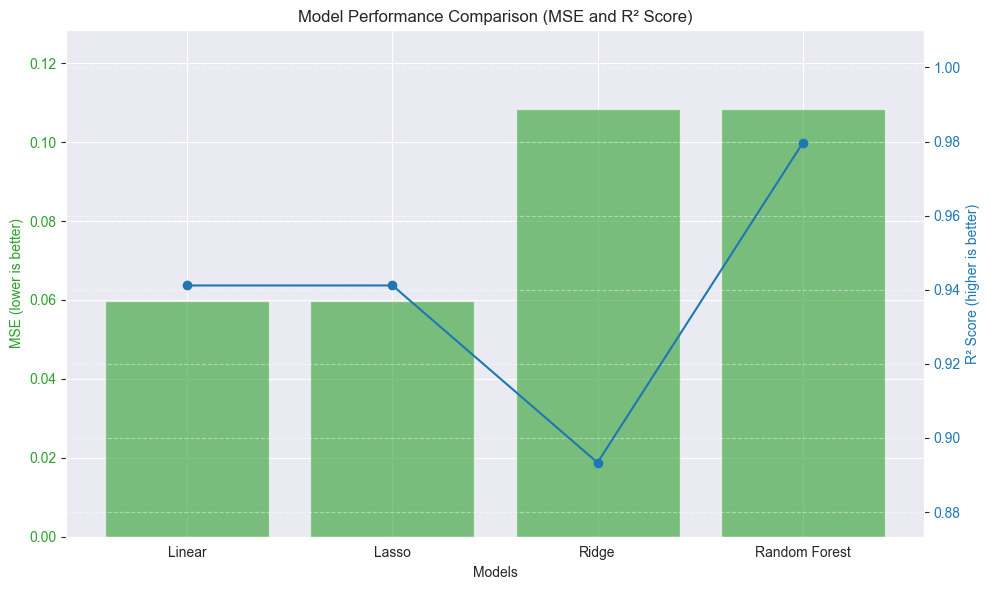

In [31]:
ml_conclusion(mse_lin, r2_lin, mse_rid, r2_rid, mse_las, r2_las, mse_raf, r2_raf)

## **Conclusion**

In this project, we compared the performance of several regression models — **Linear Regression**, **Lasso Regression**, **Ridge Regression**, and **Random Forest Regressor** — on predicting the air quality indicator `C6H6(GT)`.

| Model            | MSE     | R² Score |
|------------------|---------|----------|
| Linear           | 0.0598  | 0.9411   |
| Ridge            | 0.0598  | 0.9412   |
| Lasso            | 0.1083  | 0.8933   |
| Random Forest    | 0.1083  | 0.9796   |

### Interpretation:

- **Linear & Ridge Regression** performed identically in terms of Mean Squared Error (MSE), but Ridge gave a slightly better R² score. This suggests Ridge's regularization slightly helped without affecting error.
- **Lasso Regression**, while still performing decently, was clearly weaker — likely due to its nature of zeroing out coefficients, which may have removed useful features.
- **Random Forest** achieved the highest **R² score** of 0.9796, showing its strong ability to capture complex patterns. However, its **MSE** was slightly worse, similar to Lasso — possibly due to overfitting or less smooth prediction behavior.

---

### Note on SARIMA:

We also briefly explored the **SARIMA** model to forecast time series directly. However, due to its complexity and the specificity of its configuration (stationarity, differencing, seasonality tuning), we did not include it in the final model comparison. SARIMA models require deeper statistical understanding and fine-tuning (e.g., ACF/PACF analysis, stationarity checks), which is beyond the scope of the current work.

We plan to return to SARIMA in future projects when equipped with stronger time series modeling experience.
